In [1]:
!pip install git+https://github.com/netbrainml/nbml.git
from nbml.pytorch import *
from nbml.workshops.cifar100.utils import *

  Cloning https://github.com/netbrainml/nbml.git to /tmp/pip-req-build-0oxx8oz4
  Running command git clone -q https://github.com/netbrainml/nbml.git /tmp/pip-req-build-0oxx8oz4
  Created wheel for nbml: filename=nbml-0.0.1-cp36-none-any.whl size=13124 sha256=28283b880ab99d377d6a6ce9263c2079f1826ad7ef243908c528a5adef2dbf1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_syu8els/wheels/3a/b1/27/4431be29eb1fbe8f0912364e44fecc078167c19415ed958b11
Successfully built nbml


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
x_train, x_test, y_train, y_test = getCIFAR100()
tdl, vdl = torchCIFAR100(x_train, x_test, y_train, y_test, bs=128)

169009152/169001437 [==============================] - 11s 0us/step
arg_0: (50000, 32, 32, 3)
arg_1: (10000, 32, 32, 3)
arg_2: (50000, 1)
arg_3: (10000, 1)
arg_0: torch.Size([50000, 3, 32, 32])
arg_1: torch.Size([10000, 3, 32, 32])
arg_2: torch.Size([50000])
arg_3: torch.Size([10000])


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from fastai.torch_core import Module

def init_cnn(m, *layers):
    if getattr(m, 'bias', None) is not None: nn.init.constant_(m.bias, 0)
    if isinstance(m, (layers)): nn.init.kaiming_normal_(m.weight)
    for l in m.children(): init_cnn(l)

class Flatten(Module):
    def __call__(self,x): return torch.flatten(x, start_dim=1)
    
def conv(ni,nf, ks=3, stride=1, pad=0):
    return nn.Sequential(nn.Conv2d(ni, nf, ks, stride,pad),
                         nn.ReLU(inplace=True))
class ConvNet(BasicTrainableClassifier):
    def __init__(self, ni, nc, init=False):
        super().__init__()
        self.model = nn.Sequential(conv(ni, 64, 3, 1),
                                   conv(64, 128),
                                   nn.MaxPool2d(2,2),
                                   conv(128, 256),
                                   nn.MaxPool2d(2,2),
                                   conv(256, 512),
                                   nn.AdaptiveMaxPool2d(1),
                                   Flatten(),
                                   nn.Linear(512, nc)
                                  )
        if init: init_cnn(self, nn.Conv2d, nn.Linear)
    def forward(self,x): return self.model(x)

In [4]:
noinit = ConvNet(3,100).cuda()
init = ConvNet(3,100, init=True).cuda()

In [5]:
noinit.fit(tdl, vdl, cbs=True, epochs=10)

100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 1:
	Train Loss: 3.452 | Train Acc: 17.53%
	 Val. Loss: 3.490 |  Val. Acc: 16.86%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 2:
	Train Loss: 2.948 | Train Acc: 27.62%
	 Val. Loss: 3.037 |  Val. Acc: 26.58%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 3:
	Train Loss: 2.617 | Train Acc: 34.37%
	 Val. Loss: 2.796 |  Val. Acc: 31.60%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 4:
	Train Loss: 2.417 | Train Acc: 38.37%
	 Val. Loss: 2.696 |  Val. Acc: 33.46%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 5:
	Train Loss: 2.144 | Train Acc: 44.25%
	 Val. Loss: 2.516 |  Val. Acc: 37.08%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 6:
	Train Loss: 1.990 | Train Acc: 47.95%
	 Val. Loss: 2.486 |  Val. Acc: 38.14%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 7:
	Train Loss: 1.774 | Train Acc: 53.00%
	 Val. Loss: 2.382 |  Val. Acc: 40.92%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 8:
	Train Loss: 1.624 | Train Acc: 56.31%
	 Val. Loss: 2.369 |  Val. Acc: 40.76%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 9:
	Train Loss: 1.493 | Train Acc: 59.70%
	 Val. Loss: 2.355 |  Val. Acc: 42.05%


100% (391 of 391) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (391 of 391) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (79 of 79) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Epoch 10:
	Train Loss: 1.331 | Train Acc: 64.05%
	 Val. Loss: 2.345 |  Val. Acc: 42.51%


In [6]:
init_m.fit(tdl, vdl, cbs=True, epochs=10)

NameError: name 'init_m' is not defined

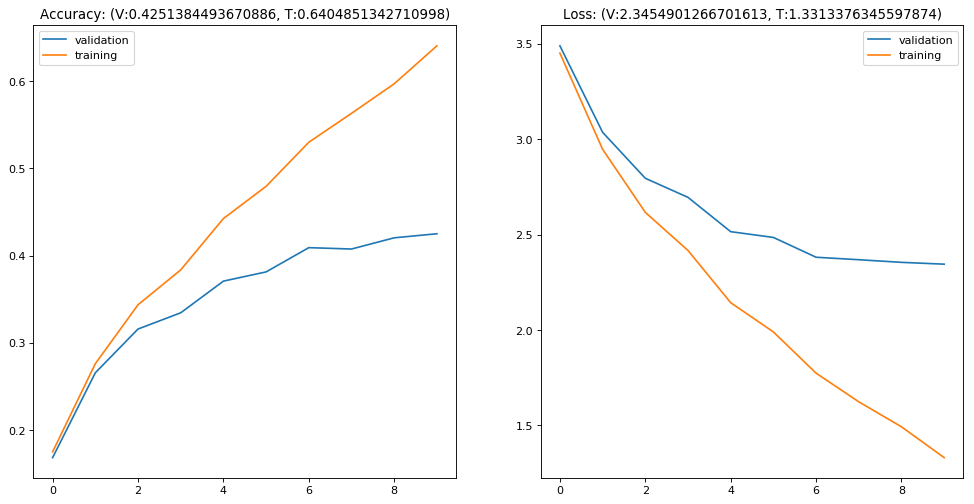

NameError: name 'init_m' is not defined

In [7]:
noinit.plot
init_m.plot